<b> Introduction </b>

In combat sports, we often hear the terms height, reach and weight advantage.
It is generally taken as a given that these factors provide a net advantage to the fighter.  

It has also been noted in various sports that proportions are relevant as well as absolute measures.  In MMA, many people are aware of what this notebook calls  the ape-index.  This compares the fighter's reach (length from fingertip to fingertip with arms outstretched) to their height.  A notable example is the widely considered GOAT (greatest of all time) Jon Jones who is 6'4 (193cm) tall with a reach of 7'0 (213cm). For comparison, a typical man will have a reach that is equal to his height.

This project attempts to quantify the extent of these advantages in MMA, if they exist at all.

<b> Limitations: </b>

-The data is limited to the UFC which is generally consired to be the top tier organization of MMA. 

-This data mostly looks at fights which are restricted to weight classes. Therefore, the differences between fighters are generally small.

-This data looks at fights which were made.  Fights are generally only made when the fighters are of a comparable standard and it is possible for either fighter to win.  This means that physical advantages may often be discriminated against by skill differences in the interest of competiveness.  

<b> To do list </b>

Ape index [x]
Reach [x]
Height [x]
Weight [x]

(same as above but restricted to heavyweight because of weight differences)

fight wins, streak, longest streak, [x]

champ correlations [x]
rank filterning[]
buckets[]
distribution graphs []
adding graphics[]
dividing nicely []
boxing comparison []


<b> Set-Up </b>

In [183]:
###Loading Libraries
import pandas as pd
import numpy as np

In [184]:
####Loading Data
df=pd.read_csv("C:/Users/dariu/Desktop/Kaggle/ufc-master.csv")

####Converting winner/title to binary/numeric values to allow correlation operation
df["Red_wins"]=df["Winner"].apply(lambda x: 1 if x == "Red" else 0)
df["Red_loses"]=df["Winner"].apply(lambda x: 0 if x == "Red" else 1)
df["Red_is_champ"]=df["title_bout"].apply(lambda x: 1 if x == True else 0)


#####Converting win method to binary/numeric finish/no finish
df["finish_win"]=df["finish"]
df["finish_win"].replace(["KO/TKO","SUB"],1, inplace = True)
df["finish_win"].replace(["U-DEC","S-DEC","M-DEC"],0, inplace = True)
df["finish_win"].replace(["DQ","Overturned"],np.NaN, inplace = True)
df["red_finish_win"]=df["finish_win"]
for x in range(len(df)):
    if df.at[x,"Winner"] == "blue":
        df.at[x,"red_finish_win"]=0
        x +=1


<b>Height</b>

In [185]:
###Height

df["R_Height_adv"]=df["R_Height_cms"]-df["B_Height_cms"]
df_height= df[["R_Height_cms","R_Height_adv", "Red_wins","R_longest_win_streak", "R_current_win_streak", "Red_is_champ","red_finish_win"]]
df_height.corr()

,R_Height_cms,R_Height_adv,Red_wins,R_longest_win_streak,R_current_win_streak,Red_is_champ,red_finish_win
R_Height_cms,1.000000,0.380879,-0.005663,0.110969,0.024510,-0.035978,0.146262
R_Height_adv,0.380879,1.000000,0.034672,-0.001862,0.022734,0.007558,-0.005751
Red_wins,-0.005663,0.034672,1.000000,0.028224,0.062771,0.048975,0.005530
R_longest_win_streak,0.110969,-0.001862,0.028224,1.000000,0.512995,0.269434,0.022176
R_current_win_streak,0.024510,0.022734,0.062771,0.512995,1.000000,0.445515,0.036440
Red_is_champ,-0.035978,0.007558,0.048975,0.269434,0.445515,1.000000,0.021850
red_finish_win,0.146262,-0.005751,0.005530,0.022176,0.036440,0.021850,1.000000


In [196]:
###Height Buckets


bins = np.array([-30,-20,-15,-10,-5,-0.1,0,5,10,15,20,30])
df["R_Height_adv_Buc"] = pd.cut(df["R_Height_adv"], bins)
table1 = pd.pivot_table(df,index="R_Height_adv_Buc",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
table1["Red_win_%"]=table1["Red_wins"]/((table1["Red_wins"])+table1["Red_loses"])
table1


,Red_loses,Red_wins,Red_win_%
R_Height_adv_Buc,,,
"(-30.0, -20.0]",2,4,0.666667
"(-20.0, -15.0]",28,33,0.540984
"(-15.0, -10.0]",125,156,0.555160
"(-10.0, -5.0]",359,477,0.570574
"(-5.0, -0.1]",271,395,0.593093
"(-0.1, 0.0]",334,429,0.562254
"(0.0, 5.0]",251,362,0.590538
"(5.0, 10.0]",311,466,0.599743
"(10.0, 15.0]",99,183,0.648936


<b>Weight</b>

In [187]:
#### Weight and height at heavyweight
### Weight differences only recorded at heavyweight. All other fighters weigh in at upper limit.

df["R_Weight_adv"]=df["R_Weight_lbs"]-df["B_Weight_lbs"]
df_heavyweight=df[df["weight_class"] == "Heavyweight"]
df_weight= df_heavyweight[["R_Weight_lbs","R_Weight_adv", "R_Height_adv", "Red_wins","R_longest_win_streak", "R_current_win_streak","Red_is_champ", "red_finish_win"]]
df_weight.corr()




,R_Weight_lbs,R_Weight_adv,R_Height_adv,Red_wins,R_longest_win_streak,R_current_win_streak,Red_is_champ,red_finish_win
R_Weight_lbs,1.000000,0.628967,0.146651,0.029767,-0.039970,-0.019712,-0.161852,0.064267
R_Weight_adv,0.628967,1.000000,0.190830,0.097206,-0.062694,0.008019,-0.085644,0.027371
R_Height_adv,0.146651,0.190830,1.000000,0.089095,0.112209,0.068256,0.021010,-0.016391
Red_wins,0.029767,0.097206,0.089095,1.000000,0.006986,-0.034413,-0.024360,0.058772
R_longest_win_streak,-0.039970,-0.062694,0.112209,0.006986,1.000000,0.385404,0.283936,-0.052195
R_current_win_streak,-0.019712,0.008019,0.068256,-0.034413,0.385404,1.000000,0.517538,0.024243
Red_is_champ,-0.161852,-0.085644,0.021010,-0.024360,0.283936,0.517538,1.000000,0.060028
red_finish_win,0.064267,0.027371,-0.016391,0.058772,-0.052195,0.024243,0.060028,1.000000


In [197]:
####Weight Buckets


bins = np.array([-30,-20,-15,-10,-5,-0.1,0,5,10,15,20,30])
df["R_Weight_adv_Buc"] = pd.cut(df["R_Weight_adv"], bins)
table1 = pd.pivot_table(df,index="R_Weight_adv_Buc",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
table1["Red_win_%"]=table1["Red_wins"]/((table1["Red_wins"])+table1["Red_loses"])
table1


,Red_loses,Red_wins,Red_win_%
R_Weight_adv_Buc,,,
"(-30.0, -20.0]",56,75,0.572519
"(-20.0, -15.0]",86,97,0.530055
"(-15.0, -10.0]",118,139,0.540856
"(-10.0, -5.0]",13,8,0.380952
"(-5.0, -0.1]",12,13,0.520000
"(-0.1, 0.0]",1228,1734,0.585415
"(0.0, 5.0]",14,22,0.611111
"(5.0, 10.0]",105,180,0.631579
"(10.0, 15.0]",95,144,0.602510


<b>Reach</b>

In [188]:
####Reach

df["R_Reach_adv"] = df["reach_dif"]
df_reach=df[["R_Reach_cms", "B_Reach_cms","R_Reach_adv","Red_wins","R_longest_win_streak", "R_current_win_streak","Red_is_champ","red_finish_win"]]

df_reach.corr()


,R_Reach_cms,B_Reach_cms,R_Reach_adv,Red_wins,R_longest_win_streak,R_current_win_streak,Red_is_champ,red_finish_win
R_Reach_cms,1.000000,0.668630,-0.359982,0.012622,0.143428,0.058710,-0.006876,0.148854
B_Reach_cms,0.668630,1.000000,0.396651,-0.045491,0.117344,0.018184,-0.032966,0.136048
R_Reach_adv,-0.359982,0.396651,1.000000,-0.072587,-0.019035,-0.040571,-0.027919,-0.020507
Red_wins,0.012622,-0.045491,-0.072587,1.000000,0.028224,0.062771,0.048975,0.005530
R_longest_win_streak,0.143428,0.117344,-0.019035,0.028224,1.000000,0.512995,0.269434,0.022176
R_current_win_streak,0.058710,0.018184,-0.040571,0.062771,0.512995,1.000000,0.445515,0.036440
Red_is_champ,-0.006876,-0.032966,-0.027919,0.048975,0.269434,0.445515,1.000000,0.021850
red_finish_win,0.148854,0.136048,-0.020507,0.005530,0.022176,0.036440,0.021850,1.000000


In [198]:
####Reach Buckets

bins = np.array([-30,-20,-15,-10,-5,-0.1,0,5,10,15,20,30])
df["R_Reach_adv_Buc"] = pd.cut(df["R_Reach_adv"], bins)
table1 = pd.pivot_table(df,index="R_Reach_adv_Buc",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
table1["Red_win_%"]=table1["Red_wins"]/((table1["Red_wins"])+table1["Red_loses"])
table1


,Red_loses,Red_wins,Red_win_%
R_Reach_adv_Buc,,,
"(-30.0, -20.0]",15,38,0.716981
"(-20.0, -15.0]",74,120,0.618557
"(-15.0, -10.0]",133,224,0.627451
"(-10.0, -5.0]",272,454,0.625344
"(-5.0, -0.1]",244,312,0.561151
"(-0.1, 0.0]",217,325,0.599631
"(0.0, 5.0]",240,317,0.569120
"(5.0, 10.0]",337,449,0.571247
"(10.0, 15.0]",181,206,0.532300


<b>Ape Index</b>

In [209]:
### Is the Ape Index a significant factor? (having long arms vs height) ###

#####Creating columns that generate fighter's ape indices (ratio of height to reach).
#### "AI diff" represents the difference between the two fighters.

df["R_ape_index"]=df["R_Reach_cms"]/df["R_Height_cms"]
df["B_ape_index"]=df["B_Reach_cms"]/df["B_Height_cms"]
df["R_AI_adv"]=df["R_ape_index"]/df["B_ape_index"]

###Creating smaller data frame
df_ape=df[["R_AI_adv","R_ape_index","Red_wins","R_longest_win_streak", "R_current_win_streak","Red_is_champ","red_finish_win"]]

df_ape.corr()

,R_AI_adv,R_ape_index,Red_wins,R_longest_win_streak,R_current_win_streak,Red_is_champ,red_finish_win
R_AI_adv,1.000000,0.677454,0.054655,0.039690,0.034709,0.036504,0.031716
R_ape_index,0.677454,1.000000,0.036941,0.108148,0.082029,0.049200,0.054787
Red_wins,0.054655,0.036941,1.000000,0.028224,0.062771,0.048975,0.005530
R_longest_win_streak,0.039690,0.108148,0.028224,1.000000,0.512995,0.269434,0.022176
R_current_win_streak,0.034709,0.082029,0.062771,0.512995,1.000000,0.445515,0.036440
Red_is_champ,0.036504,0.049200,0.048975,0.269434,0.445515,1.000000,0.021850
red_finish_win,0.031716,0.054787,0.005530,0.022176,0.036440,0.021850,1.000000


In [211]:


bins = np.array([0.8,0.9, 0.95,0.975,1,1.025,1.05,1.1,1.2,])
df["R_AI_adv_Buc"] = pd.cut(df["R_AI_adv"], bins)
table1 = pd.pivot_table(df,index="R_AI_adv_Buc",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
table1["Red_win_%"]=table1["Red_wins"]/((table1["Red_wins"])+table1["Red_loses"])
table1


,Red_loses,Red_wins,Red_win_%
R_AI_adv_Buc,,,
"(0.8, 0.9]",3,3,0.500000
"(0.9, 0.95]",146,155,0.514950
"(0.95, 0.975]",343,481,0.583738
"(0.975, 1.0]",462,612,0.569832
"(1.0, 1.025]",389,537,0.579914
"(1.025, 1.05]",334,514,0.606132
"(1.05, 1.1]",125,226,0.643875
"(1.1, 1.2]",7,17,0.708333


<b> Conclusion </b>

It seems that the following have significant effects:


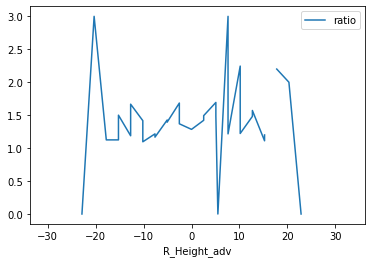

In [191]:
table = pd.pivot_table(df,index="R_Height_adv",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
table["ratio"]=table["Red_wins"]/table["Red_loses"]
table_ratio=pd.pivot_table(table,index="R_Height_adv",values = ["ratio"], aggfunc=np.sum)
table_ratio.plot()